In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from autoencoder import Autoencoder
from solver import Solver

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


In [20]:
minist = pd.read_csv("/home/sywi/Documents/CI/Autoencoder/mnist/fashion-mnist_test.csv")
minist_sample = minist.sample(n=1000, random_state=1)
minist_sample.to_csv('sample_mnist.csv', index=False)

In [21]:
train = pd.read_csv('sample_mnist.csv')
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

## normalize and reshape the predictors  
train_x = train_x / 255

## create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

## reshape the inputs
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)
f'train shape {train_x.shape}, test shape {val_x.shape}'

'train shape (800, 784), test shape (200, 784)'

In [22]:
data = {"X_train":train_x, "y_train":train_x}
model = Autoencoder(input_dim=784, hidden_dim=[1564, 392, 1564], num_classes=784)
autoencoder = Solver(model, data, learning_rate=1e-2, num_epochs=10)
autoencoder.train()

In [23]:
pred = model.loss(val_x)
np.mean(abs(np.square(val_x - pred))) 

0.02440541206368251

Text(0.5, 1.0, 'Mean Square Error')

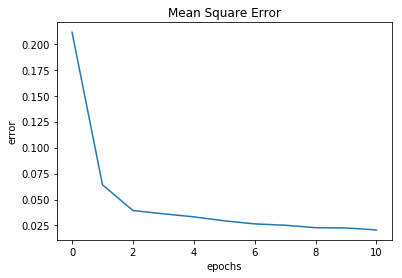

In [31]:
plt.plot(autoencoder.train_error_history)
plt.xlabel("epochs")
plt.ylabel("error")
plt.title("Mean Square Error")

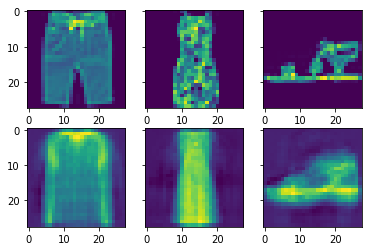

In [27]:
f, ax = plt.subplots(2, 3, sharey=True)
ax[0,0].imshow(val_x[10].reshape(28,28), cmap='viridis', interpolation='none')
ax[1,0].imshow(pred[10].reshape(28,28), cmap='viridis', interpolation='none')
ax[0,1].imshow(val_x[1].reshape(28,28), cmap='viridis', interpolation='none')
ax[1,1].imshow(pred[1].reshape(28,28), cmap='viridis', interpolation='none')
ax[0,2].imshow(val_x[180].reshape(28,28), cmap='viridis', interpolation='none')
ax[1,2].imshow(pred[180].reshape(28,28), cmap='viridis', interpolation='none')
plt.show()